# Linear Regression Practical Implementation

In [4]:
import pandas as pd
import numpy as np

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=fetch_california_housing()

In [10]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [15]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
1894,2.6750,25.0,6.323741,1.284173,689.0,2.478417,38.92,-120.01,1.042
13654,4.7344,29.0,6.444156,0.994805,1188.0,3.085714,34.04,-117.31,1.346
17619,5.1104,30.0,5.280443,1.003690,1387.0,2.559041,37.27,-121.93,2.781
13290,2.8702,36.0,5.245570,1.032911,964.0,2.440506,34.07,-117.66,1.370
2804,4.3162,14.0,6.048110,1.037801,1748.0,3.003436,35.45,-119.03,0.871


In [16]:
df.shape

(20640, 9)

In [43]:
df.target.value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: target, Length: 3842, dtype: int64

In [20]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [32]:
X = df.drop(['target'],axis=1)
y = df['target']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(
    X,y,test_size=0.30,random_state=42)

In [37]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [38]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,1.020833,581.0,2.420833,37.36,-121.90
13512,1.4891,41.0,4.551852,1.118519,994.0,3.681481,34.11,-117.32
10842,3.5120,16.0,3.762287,1.075614,5014.0,2.369565,33.67,-117.91
16559,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82,-121.28


In [39]:
y_train

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
          ...   
11284    2.29200
11964    0.97800
5390     2.22100
860      2.83500
15795    3.25000
Name: target, Length: 14448, dtype: float64

In [40]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: target, Length: 6192, dtype: float64

In [47]:
# standadizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [53]:
X_train=scaler.fit_transform(x_train)
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [54]:
X_test=scaler.transform(x_test)
X_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

In [55]:
scaler.inverse_transform(X_train)

array([[   4.1312    ,   35.        ,    5.88235294, ...,    2.98529412,
          33.93      , -118.02      ],
       [   2.8631    ,   20.        ,    4.40120968, ...,    2.0141129 ,
          32.79      , -117.09      ],
       [   4.2026    ,   24.        ,    5.61754386, ...,    2.56491228,
          34.59      , -120.14      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
# cross validation
from sklearn.model_selection import cross_val_score

In [58]:
regression=LinearRegression()

In [73]:
msc = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [84]:
regression.fit(X_train,y_train)

LinearRegression()

In [85]:
msc

array([-0.56799593, -0.52918854, -0.48456478, -0.51627013, -0.54833859,
       -0.47884524, -0.47828648, -0.55465187, -0.55647389, -0.54248888])

In [86]:
np.mean(msc)

-0.5257104326777

In [87]:
#predict
reg_pred_test = regression.predict(X_test)
reg_pred_train = regression.predict(X_train)

In [89]:
print(reg_pred_test)

[0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]


In [90]:
print(reg_pred_train)


[2.13761366 1.76385736 2.75114302 ... 2.03900584 2.84130506 2.27916759]


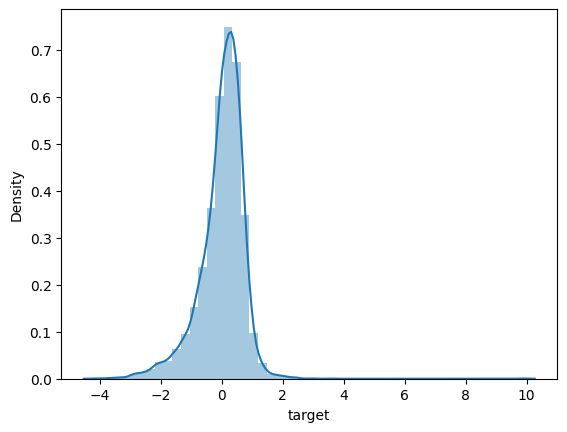

In [98]:
sns.distplot(reg_pred_test-y_test)
plt.show()

In [103]:
from sklearn.metrics import mean_squared_error

In [104]:
from sklearn.metrics import r2_score
c_mat=r2_score(reg_pred_test,y_test)
c_mat

0.34513393809439663

In [105]:
# Define the hyperparameter grid to search
param_grid = {'fit_intercept': [True, False]}

# Create the GridSearchCV object
grid_search = GridSearchCV(regression, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
reg_pred_test = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, reg_pred_test)
print(f"Mean Squared Error on Test Data: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error on Test Data: 0.5305677824766755
